# プロットと可視化のサンプル

サンプルとして

https://github.com/miyamotok0105/pydata-book/blob/master/ch08-J.ipynb

https://github.com/miyamotok0105/machine-learning-handson/blob/master/scratch_py/ch04-1.ipynb


In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [8]:
#図のクリア
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# matplotlib

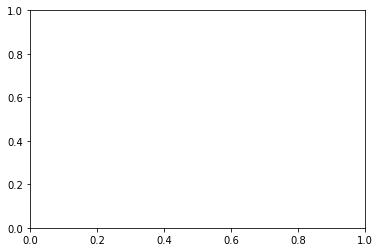

In [3]:
plt.subplot(111) #1個表示 (1 * 1グリッドで1個)

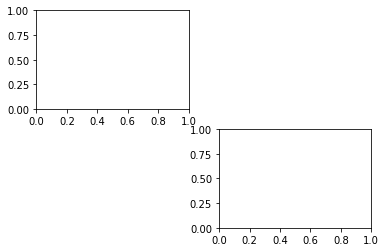

In [4]:
plt.subplot(221) #2 * 2グリッドの１個目を表示
plt.subplot(224) #2 * 2グリッドの4個目を表示

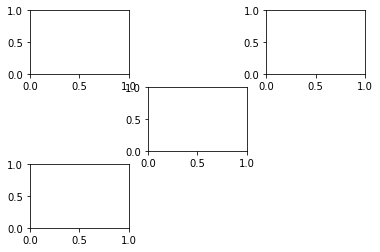

In [5]:
plt.subplot(3,3,1)
plt.subplot(3,3,3)
plt.subplot(3,3,5)
plt.subplot(3,3,7)

# Series

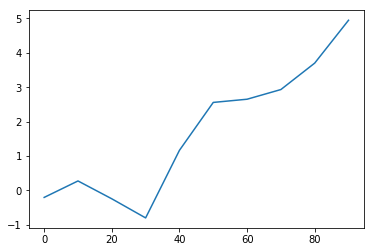

In [6]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

# DataFrame

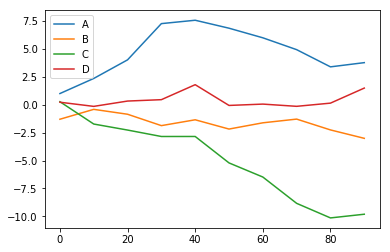

In [7]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

# mplot3d

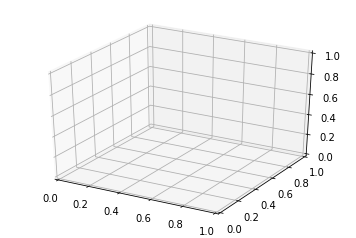

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #ここ
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

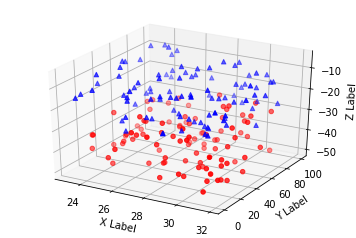

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# seaborn

In [14]:
iris = sns.load_dataset("iris")

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


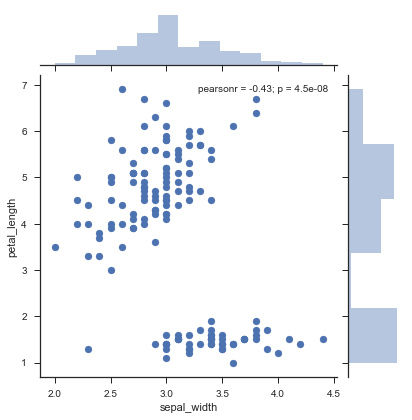

In [15]:
#散布図
sns.jointplot('sepal_width', 'petal_length', data=iris)

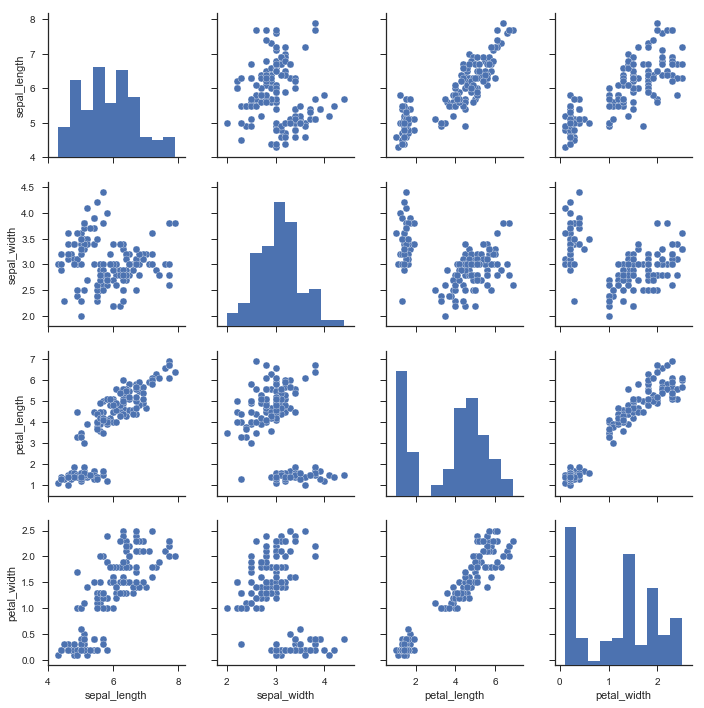

In [12]:
#散布図のペア
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris)

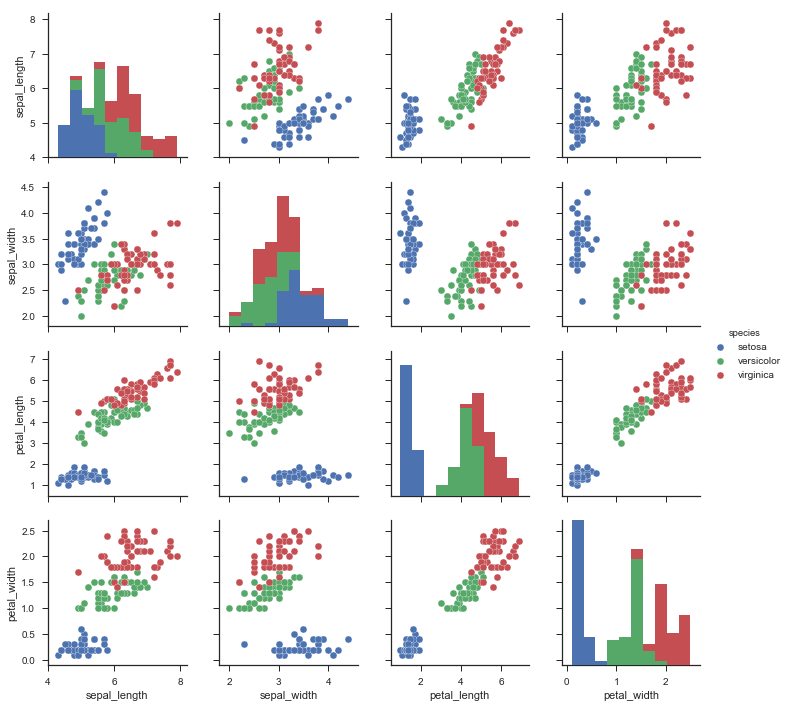

In [16]:
sns.pairplot(iris, hue="species")

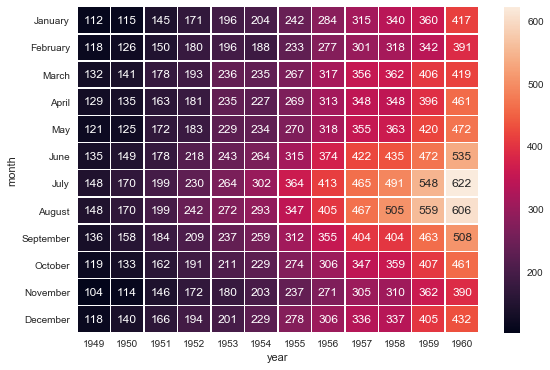

In [17]:
#注釈付きヒートマップ
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# plotly

In [18]:
#クラウドベースの可視化ツール
#sudo pip install plotly
#sudo pip install cufflinks
#sudo pip install pandas_datareader


In [19]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])
#htmlが出力される

'file:///Users/miyamoto/Projects/sample/machine-learning-handson/weeyble/temp-plot.html'

In [20]:
init_notebook_mode(connected=True)

In [22]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [23]:
from plotly.graph_objs import *
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

matplotlibで書く深層学習の最適化関数の評価時のグラフ

Text(0.5,0,'x1')

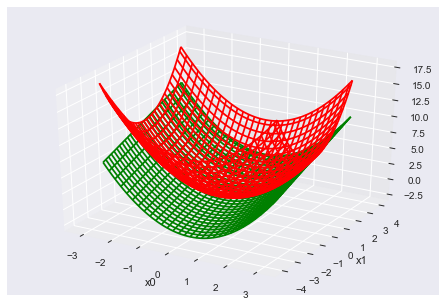

In [24]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
plt.switch_backend('agg')
from mpl_toolkits.mplot3d import Axes3D

def function_2(x, a, b):
    return x[0]**a + x[1]**b

#座標ベクトルから座標行列を生成し、タプルで返す
x = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
#２変数関数を計算
z2 = function_2(x, 2, 2)
z3 = function_2(x, 2, 1)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x[0], x[1], z2, color="red")
ax.plot_wireframe(x[0], x[1], z3, color="green")

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("x0")
plt.ylabel("x1")

plotlyで書く。

In [26]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import *
import numpy as np
init_notebook_mode(connected=True)

def function_2(x, a1, a2):
    return a1*x[0]**2 + a2*x[1]**2

x = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
data = [
    go.Surface(x=x[0], y=x[1], z=function_2(x, 2, 2), colorscale='Viridis'),
    go.Surface(x=x[0], y=x[1], z=function_2(x, 2, 1), colorscale='red'),
    go.Surface(x=x[0], y=x[1], z=function_2(x, 2, 0))
]
layout = go.Layout(title='plotly', autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-surface')

# よりかっこいいplotly

In [25]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import *
import numpy as np
init_notebook_mode(connected=True)

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(x=x, y=y, z=z, mode='markers',
    marker=dict(size=12, line=dict(color='rgba(217, 217, 217, 0.14)', width=0.5), opacity=0.8))

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(x=x2, y=y2, z=z2, mode='markers', marker=dict(color='rgb(127, 127, 127)', size=12,  symbol='circle', line=dict(color='rgb(204, 204, 204)', width=1),opacity=0.9))

data = [trace1, trace2]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

In [28]:
#Initialize a Dashboard
import plotly.dashboard_objs as dashboard

import IPython.display
from IPython.display import Image

my_dboard = dashboard.Dashboard()
my_dboard.get_preview()

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly.graph_objs import Scatter, Figure, Layout

import numpy as np

colorscale = [[0, '#FAEE1C'], [0.33, '#F3558E'], [0.66, '#9C1DE7'], [1, '#581B98']]
trace1 = go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        colorscale=colorscale,
        showscale=True
    )
)
data = [trace1]
iplot(data, filename='scatter-for-dashboard')

In [29]:
# import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.graph_objs as go

import numpy as np

x0 = np.random.randn(50)
x1 = np.random.randn(50) + 2
x2 = np.random.randn(50) + 4
x3 = np.random.randn(50) + 6

colors = ['#FAEE1C', '#F3558E', '#9C1DE7', '#581B98']

trace0 = go.Box(x=x0, marker={'color': colors[0]})
trace1 = go.Box(x=x1, marker={'color': colors[1]})
trace2 = go.Box(x=x2, marker={'color': colors[2]})
trace3 = go.Box(x=x3, marker={'color': colors[3]})
data = [trace0, trace1, trace2, trace3]

# url_2 = plot(data, filename='box-plots-for-dashboard')
iplot(data, filename='box-plots-for-dashboard')

In [30]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [31]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )
iplot( fig, filename='d3-flight-paths' )

In [32]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import json
import numpy as np
import pandas as pd
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict(x=1, y=1, z=0.7),
        aspectmode = 'manual'
    )
)

updatemenus=list([
    dict(
        buttons=list([   
            dict(
                args=['type', 'surface'],
                label='3D Surface',
                method='restyle'
            ),
            dict(
                args=['type', 'heatmap'],
                label='Heatmap',
                method='restyle'
            )             
        ]),
        direction = 'left',
        pad = {'r': 10, 't': 10},
        showactive = True,
        type = 'buttons',
        x = 0.1,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    ),
])

annotations = list([
    dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations

fig = dict(data=data, layout=layout)
iplot(fig, filename='cmocean-picker-one-button')

In [35]:
#他のサンプル
#https://plot.ly/python/

#アカウント作らないといけないかと思ったらofflineってのなら無料で使える
#https://plot.ly/accounts/

#plotly.plotlyではなく、plotly.offlineを使用するように修正すればOK

#plotlyを無料で使う時のコード修正場所
#https://qiita.com/miyamotok0105/items/abba6dd1a8f1c71b864b